In [26]:
from google.colab import drive
drive.mount('/content/drive' ,force_remount=True)

Mounted at /content/drive


In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
# Preprocessing :
from sklearn.preprocessing import  StandardScaler, LabelEncoder, Normalizer 
#accruacy
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay, classification_report,accuracy_score


In [28]:
# Read datasets
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/brest_cancer.csv")

print(dataset.shape)
print(dataset.head(5))

(569, 33)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  

In [29]:
dataset['diagnosis'] = dataset['diagnosis'].map({'B':0, 'M':1}).astype(int)
print(dataset.head)


<bound method NDFrame.head of            id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.2776

In [30]:
X=dataset.iloc[:, 2:32].values
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [31]:
Y=dataset.iloc[:,1].values
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [32]:
#spliting  dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [33]:
#feature Scaling
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
print(X_train)
print(X_test)

[[-0.85687349 -1.20120492 -0.86376505 ... -1.14642134 -0.51928856
  -0.71427665]
 [-2.08983618 -1.35127504 -2.05241046 ... -1.75899356  0.05016143
   0.5636507 ]
 [-0.77090109 -0.44147497 -0.75897373 ... -0.75907327 -0.50649193
  -0.13153313]
 ...
 [-0.16909435 -0.10381721 -0.16226941 ...  0.46981972  0.98751451
   0.17605598]
 [-0.06237     1.24212413  0.04947835 ...  0.61663713  1.20025847
   1.88698663]
 [-1.48269321 -0.43678528 -1.40287745 ...  0.97430934  2.12321534
   1.84374035]]
[[-0.88651914 -0.99954821 -0.88844731 ... -0.70409483  0.48204767
  -0.56886106]
 [-0.24320848  1.42033239 -0.30689876 ... -0.8210802  -0.73043294
  -0.83860968]
 [ 2.24702633  0.72391326  2.30422393 ...  2.02389766  1.48338389
   0.93556864]
 ...
 [-1.01696001 -0.0569203  -0.94863737 ... -0.52104163  0.06295806
  -0.40668754]
 [-0.16316522  0.38156582 -0.12069929 ...  1.76774813 -0.1497859
   1.28153881]
 [-0.65824762 -0.4227162  -0.68925719 ... -1.08644486  0.47884851
  -0.9532123 ]]


In [40]:
# Regression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression,LogisticRegression
#decision tree
from sklearn.tree import DecisionTreeClassifier
#KNN
from sklearn.neighbors import KNeighborsClassifier
#naive_bayes
from sklearn.naive_bayes import GaussianNB
#svm
from sklearn.svm import SVC, LinearSVC
#randomforest classifier
from sklearn.ensemble import RandomForestClassifier 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold

In [44]:
models=[]

models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('RF',RandomForestClassifier()))
models.append(('SVM',SVC(gamma='auto')))

models

[('LR', LogisticRegression(multi_class='ovr', solver='liblinear')),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('RF', RandomForestClassifier()),
 ('SVM', SVC(gamma='auto'))]

LR: 0.969269
LDA: 0.955426
KNN: 0.964784
CART: 0.920044
NB: 0.936711
RF: 0.953378
SVM: 0.978793


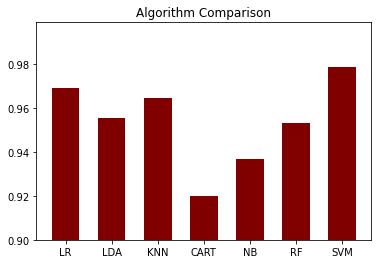

In [45]:
results = []
names = []
res = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, shuffle=True,  random_state=None)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    res.append(cv_results.mean())
    print('%s: %f' % (name,cv_results.mean()))

pyplot.ylim(.900, .999)
pyplot.bar(names, res, color='maroon', width=0.6)

pyplot.title("Algorithm Comparison")
pyplot.show()


In [46]:
model.fit(X_train, Y_train)
pred = model.predict(X_test)
print(pred)

[0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1
 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0
 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1
 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0]
